## This will be a space where I play out any further analyses

In [28]:
import pandas as pd
import nltk
import sklearn
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns        # seaborn graphical package
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

In [31]:

allpresdebate = pd.read_csv("/Users/emmatarcson/Documents/data_science/RhetoricalFactor-analysis/data/all_speakers/presdebatewelker.csv")
allpresdebate = allpresdebate[['Aff','transcript']]
allpresdebate.Aff.value_counts()

R       193
None    188
D       131
Name: Aff, dtype: int64

In [45]:
allpresdebate

,Aff,transcript,adjectives,adjectives2
0,None,"Good evening, everyone. Good evening. Thank yo...",Good Good such final first first glad thankful...,None
1,R,How are you doing? How are you?,,None
2,None,And I do want to say a very good evening to bo...,good major uninterrupted first,None
3,None,The goal is for you to hear each other and for...,other American re ready first dangerous new Mo...,None
4,None,… during this next stage of the coronavirus cr...,next,None
...,...,...,...,...
507,None,"All right. Vice President Biden, same question...",same inaugural,None
508,D,"I will say, I’m an American President. I repre...",American sure enormous enormous better,None
509,D,"We can grow this economy, we can deal with the...",systemic same sure clean new ’ sure sure ’ last,None
510,None,"All right, I want to thank you both for a very...",robust fantastic tonight most great,None


In [3]:
import pandas as pd
from textblob import TextBlob

In [52]:
def get_adjectives(text):
    blob = TextBlob(text)
    return ' '.join(word for (word,tag) in blob.tags if tag.startswith("JJ"))

allpresdebate['adjectives'] = allpresdebate['transcript'].apply(get_adjectives)
adj_count = [len(nltk.word_tokenize(t)) for t in allpresdebate.adjectives]
allpresdebate['adj_count'] = adj_count

In [53]:
allpresdebate

,Aff,transcript,adjectives,adjectives2,adj_count
0,None,"Good evening, everyone. Good evening. Thank yo...",Good Good such final first first glad thankful...,None,23
1,R,How are you doing? How are you?,,None,0
2,None,And I do want to say a very good evening to bo...,good major uninterrupted first,None,4
3,None,The goal is for you to hear each other and for...,other American re ready first dangerous new Mo...,None,13
4,None,… during this next stage of the coronavirus cr...,next,None,1
...,...,...,...,...,...
507,None,"All right. Vice President Biden, same question...",same inaugural,None,2
508,D,"I will say, I’m an American President. I repre...",American sure enormous enormous better,None,5
509,D,"We can grow this economy, we can deal with the...",systemic same sure clean new ’ sure sure ’ last,None,10
510,None,"All right, I want to thank you both for a very...",robust fantastic tonight most great,None,5


In [70]:
allpresdebate[allpresdebate.Aff == 'D'].adj_count.max()

21

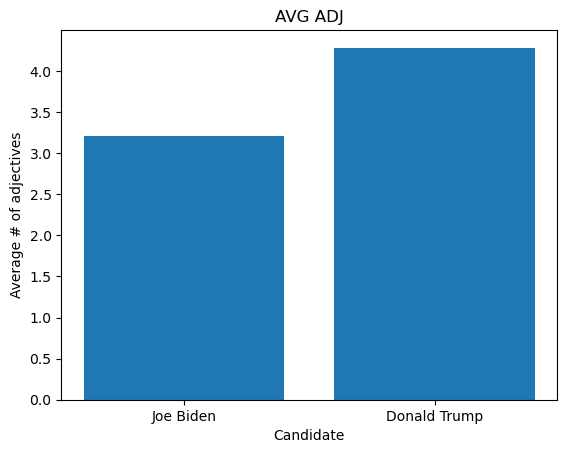

In [74]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

aff = ['Donald Trump','Joe Biden']
mean_adj = [allpresdebate[allpresdebate.Aff == 'R'].adj_count.mean(), allpresdebate[allpresdebate.Aff == 'D'].adj_count.mean()]

plt.bar(aff,mean_adj)
plt.title('AVG ADJ')
plt.ylabel('Average # of adjectives')
plt.xlabel('Candidate')
plt.show()

In [71]:
allvpdebate = pd.read_csv("/Users/emmatarcson/Documents/data_science/RhetoricalFactor-analysis/data/all_speakers/pagedebate2020.csv")
allvpdebate = allvpdebate[['Aff','transcript']]
allvpdebate.Aff.value_counts()

None    120
R       113
D        94
Name: Aff, dtype: int64

In [92]:
vpdebate = pd.read_csv("/Users/emmatarcson/Documents/data_science/RhetoricalFactor-analysis/data/only_D_and_R/pageVPdebate.csv")
vpdebate = vpdebate[['Aff','transcript']]

presdebate = pd.read_csv("/Users/emmatarcson/Documents/data_science/RhetoricalFactor-analysis/data/only_D_and_R/welkerPRESdebate.csv")
presdebate = presdebate[['Aff','transcript']]

In [93]:
alldebates = pd.concat([vpdebate, presdebate])
def get_adjectives(text):
    blob = TextBlob(text)
    return ' '.join(word for (word,tag) in blob.tags if tag.startswith("JJ"))

alldebates['adjectives'] = alldebates['transcript'].apply(get_adjectives)
adj_count = [len(nltk.word_tokenize(t)) for t in alldebates.adjectives]
alldebates['adj_count'] = adj_count

In [72]:
def get_adjectives(text):
    blob = TextBlob(text)
    return ' '.join(word for (word,tag) in blob.tags if tag.startswith("JJ"))

allvpdebate['adjectives'] = allvpdebate['transcript'].apply(get_adjectives)
adj_count = [len(nltk.word_tokenize(t)) for t in allvpdebate.adjectives]
allvpdebate['adj_count'] = adj_count

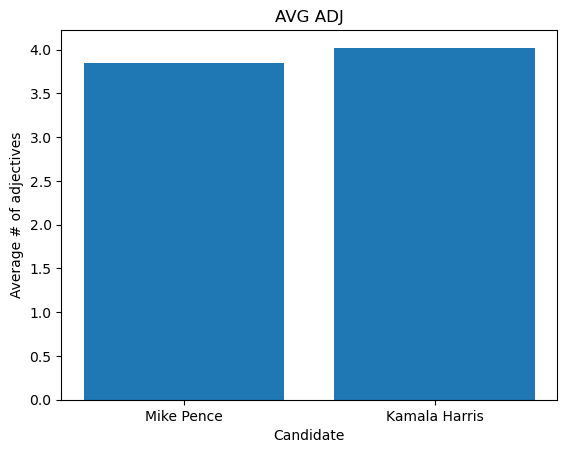

In [76]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

aff = ['Mike Pence','Kamala Harris']
mean_adj = [allvpdebate[allvpdebate.Aff == 'R'].adj_count.mean(), allvpdebate[allvpdebate.Aff == 'D'].adj_count.mean()]

plt.bar(aff,mean_adj)
plt.title('AVG ADJ')
plt.ylabel('Average # of adjectives')
plt.xlabel('Candidate')
plt.show()

In [78]:
conv_speech = pd.read_csv("/Users/emmatarcson/Documents/data_science/RhetoricalFactor-analysis/data_sample/convspeeches.csv")
conv_speech = conv_speech[['Aff','Speech']]
conv_speech.Aff.value_counts()

R    30
D    21
Name: Aff, dtype: int64

In [79]:
dem = conv_speech[conv_speech.Aff == 'D'].Speech
rep = conv_speech[conv_speech.Aff == 'R'].Speech

demfull = str(list(dem.values)).replace("',", '.').replace(" '"," ").strip('[]').strip("''")
repfull = str(list(rep.values)).replace("',", '.').replace(" '"," ").strip('[]').strip("''")

In [80]:
rep_speech = nltk.sent_tokenize(repfull)
rep_speech2 = pd.DataFrame({'Aff':'R',
                         'Sent': rep_speech})
dem_speech = nltk.sent_tokenize(demfull)
dem_speech2 = pd.DataFrame({'Aff':'D',
                         'Sent': dem_speech})
aff_sent = pd.concat([rep_speech2,dem_speech2])
aff_sent

,Aff,Sent
0,R,"""I'm Ben Carson, a retired neurosurgeon and a ..."
1,R,"Before I begin, I'd like to say that our heart..."
2,R,"As Jacob's mother has urged the country, let's..."
3,R,America is great when we behave greatly.
4,R,"In order to succeed and change, we must first ..."
...,...,...
1094,D,"Here's the truth, Donald Trump doesn't want an..."
1095,D,So whether you plan to vote by mail or in pers...
1096,D,Don't let Donald Trump take that away from you.
1097,D,"For accurate, up to date voting information th..."


In [82]:
def get_adjectives(text):
    blob = TextBlob(text)
    return ' '.join(word for (word,tag) in blob.tags if tag.startswith("JJ"))

aff_sent['adjectives'] = aff_sent['Sent'].apply(get_adjectives)
adj_count = [len(nltk.word_tokenize(t)) for t in aff_sent.adjectives]
aff_sent['adj_count'] = adj_count

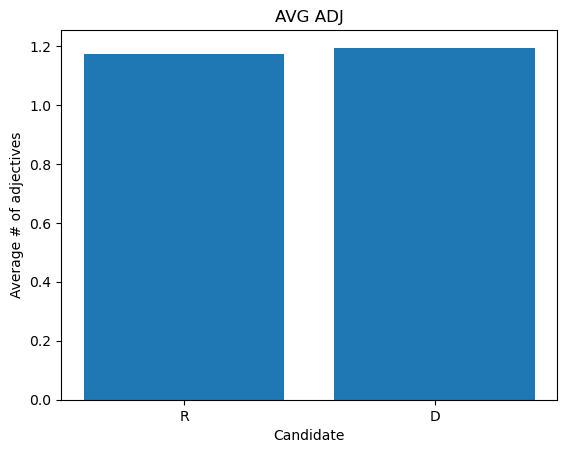

In [83]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

aff = ['R','D']
mean_adj = [aff_sent[aff_sent.Aff == 'R'].adj_count.mean(), aff_sent[aff_sent.Aff == 'D'].adj_count.mean()]

plt.bar(aff,mean_adj)
plt.title('AVG ADJ')
plt.ylabel('Average # of adjectives')
plt.xlabel('Candidate')
plt.show()

In [85]:
platform = pd.read_csv("/Users/emmatarcson/Documents/data_science/RhetoricalFactor-analysis/data2/platformsents.csv")
platform = platform[['Aff','sentences']]
platform.Aff.value_counts()

R    1581
D    1527
Name: Aff, dtype: int64

In [87]:
def get_adjectives(text):
    blob = TextBlob(text)
    return ' '.join(word for (word,tag) in blob.tags if tag.startswith("JJ"))

platform['adjectives'] = platform['sentences'].apply(get_adjectives)
adj_count = [len(nltk.word_tokenize(t)) for t in platform.adjectives]
platform['adj_count'] = adj_count

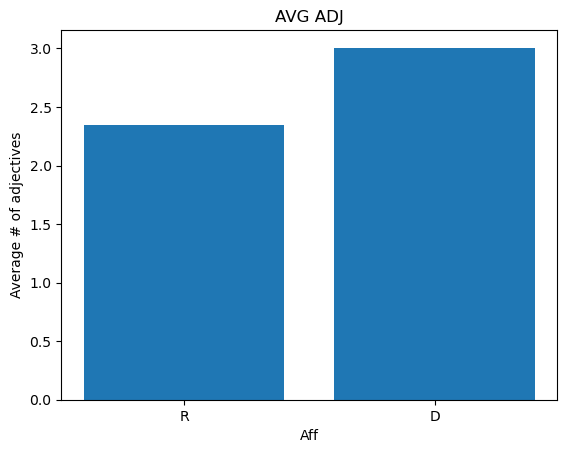

In [89]:
aff = ['R','D']
mean_adj = [platform[platform.Aff == 'R'].adj_count.mean(), platform[platform.Aff == 'D'].adj_count.mean()]

plt.bar(aff,mean_adj)
plt.title('AVG ADJ')
plt.ylabel('Average # of adjectives')
plt.xlabel('Aff')
plt.show()

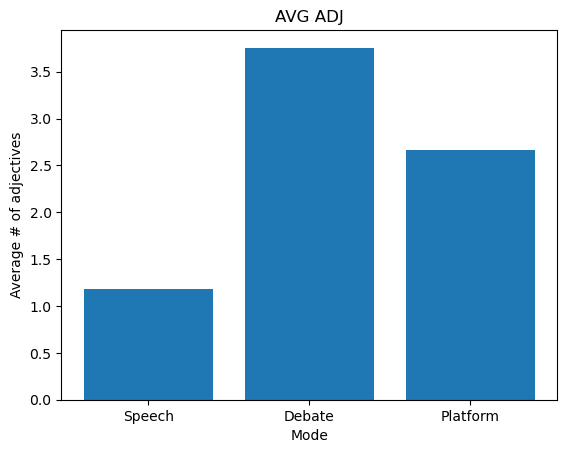

In [94]:
aff = ['Speech','Debate', 'Platform']
mean_adj = [aff_sent.adj_count.mean(), alldebates.adj_count.mean(), platform.adj_count.mean()]

plt.bar(aff,mean_adj)
plt.title('AVG ADJ')
plt.ylabel('Average # of adjectives')
plt.xlabel('Mode')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(allpresdebate['adjectives'], allpresdebate['Aff'], random_state=0,
                                  train_size=0.6) 

vectorizer = TfidfVectorizer(min_df=1, max_features=4000, stop_words='english')

X_text_train = vectorizer.fit_transform(X_train)
X_text_test = vectorizer.transform(X_test)

from sklearn.svm import SVC 
svcmodel = SVC(kernel='linear', C=1E5)  
svcmodel.fit(X_text_train, y_train)
pred = svcmodel.predict(X_text_test)
accuracy_score(y_test, pred)

0.551219512195122

In [35]:
X_train, X_test, y_train, y_test = train_test_split(allpresdebate['adjectives'], allpresdebate['Aff'], random_state=0,
                                  train_size=0.6)
nbmodel = MultinomialNB()
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2,max_features=1500, stop_words='english') #using this to find vocab
X_text_train = vectorizer.fit_transform(X_train)
X_text_test = vectorizer.transform(X_test)


nbmodel.fit(X_text_train, y_train)


def print_top(vectorizer, clf, class_labels, n):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        top = np.argsort(clf.coef_[i])[0-n:]
        print("%s: %s" % (class_label,
              ", ".join(feature_names[j].replace(' ', '-') for j in top)))
    

print_top(vectorizer, nbmodel, nbmodel.classes_, 60)


D: tremendous, unconstitutional, beautiful, bad, uninterrupted, horrible, friendly, military, unethical, long, small, korean, smaller, open, high, tonight, dead, public, great, environmental, worse, black, young, free, little, president, vice, private, soon, nuclear, middle, solitary, best, right, different, ukrainian, economic, unwilling, isn, ve, better, low, wrong, real, old, big, republican, foreign, dangerous, minimum, good, ll, american, clear, federal, single, new, able, true, sure
None: wrong, unwilling, old, friendly, open, free, vibrant, worse, bad, best, better, big, true, smaller, clear, tremendous, dead, successful, economic, soon, solitary, socialized, criminal, possible, sure, long, ukrainian, unethical, beautiful, biggest, korean, dangerous, great, ready, small, minimum, tonight, fantastic, right, different, environmental, black, robust, young, second, unconstitutional, public, specific, nuclear, foreign, good, federal, able, new, uninterrupted, ve, president, vice, ame

In [98]:
allall = pd.concat([allvpdebate, allpresdebate])
def get_adjectives(text):
    blob = TextBlob(text)
    return ' '.join(word for (word,tag) in blob.tags if tag.startswith("JJ"))

allall['adjectives'] = allall['transcript'].apply(get_adjectives)
adj_count = [len(nltk.word_tokenize(t)) for t in allall.adjectives]
allall['adj_count'] = adj_count

In [99]:
X_train, X_test, y_train, y_test = train_test_split(allall['adjectives'], allall['Aff'], random_state=0,
                                  train_size=0.6)
nbmodel = MultinomialNB()
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2,max_features=1500, stop_words='english') #using this to find vocab
X_text_train = vectorizer.fit_transform(X_train)
X_text_test = vectorizer.transform(X_test)


nbmodel.fit(X_text_train, y_train)


def print_top(vectorizer, clf, class_labels, n):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        top = np.argsort(clf.coef_[i])[0-n:]
        print("%s: %s" % (class_label,
              ", ".join(feature_names[j].replace(' ', '-') for j in top)))
    

print_top(vectorizer, nbmodel, nbmodel.classes_, 60)


D: lower, worried, minimum, significant, second, different, white, bipartisan, look, right, ukrainian, average, black, high, ve, social, transparent, clean, profit, new, affordable, military, low, national, common, little, ll, economic, russian, red, real, nuclear, private, great, renewable, better, preexisting, free, young, bright, foreign, let, complete, best, republican, wrong, public, big, single, safe, able, criminal, rid, important, true, good, responsible, clear, sure, american
None: biggest, long, hasn, beautiful, korean, ukrainian, wealthy, best, foreign, black, white, dangerous, ready, second, right, huge, complicated, professional, minimum, rapid, public, environmental, economic, major, higher, robust, open, important, socialized, modern, unconstitutional, existential, peaceful, great, let, green, nuclear, specific, likely, ll, hardest, sick, different, able, small, young, racial, federal, fundamental, latest, good, new, presidential, president, vice, uninterrupted, american

In [11]:
helpp = [tok for tok in presdebate['transcript']]
okay = nlp(helpp[1])
adjs = []
for tok in okay:
    if tok.pos==ADJ:
        #print(tok.head)
        adjs.append( (tok.text, tok.head.text) )
print(adjs)

[('greatest', 'economy'), ('horrible', 'disease'), ('worldwide', 'pandemic'), ('many', 'places'), ('other', 'places'), ('excess', 'rate'), ('lower', 'down'), ('other', 'country')]


In [21]:
tuu = [t for tok in presdebate['transcript']]
tuu

['How are you doing? How are you?',
 'So as you know, 2.2 million people modeled out, were expected to die. We closed up the greatest economy in the world in order to fight this horrible disease that came from China. It’s a worldwide pandemic. It’s all over the world. You see the spikes in Europe and many other places right now. If you notice, the mortality rate is down 85%. The excess mortality rate is way down and much lower than almost any other country. And we’re fighting it and we’re fighting it hard. There is a spike. There was a spike in Florida and it’s now gone.',
 'There was a very big spike in Texas. It’s now gone. There was a very big spike in Arizona. It’s now gone. And there was some spikes and surges and other places, they will soon be gone. We have a vaccine that’s coming. It’s ready. It’s going to be announced within weeks. And it’s going to be delivered. We have Operation Warp Speed, which is the military is going to distribute the vaccine.',
 'I can tell you from per

In [ ]:
def topic(word):
        public_health = ['pandemic', 'vaccine', 'covid', '19', '']
        social_justice = ['justice', 'injustice', 'disabilities', 'Turkish', 'Halal', 'Pakistani', 'Persian/Iranian', 'Arabian',]
        economy = ['income', 'Peruvian', 'Venezuelan', 'Salvadoran', 'Mexican', 'Brazilian', 'Colombian', 'Puerto Rican']
        school = ['Asian', 'Taiwanese', 'Cambodian', 'Izakaya', 'Singaporean', 'Thai', 'Hong Kong Style Cafe', 'Korean', 'Japanese', 'Chinese', 'Laotian', 'Szechuan', 'Cantonese', 'Vietnamese']
        climate = ['American (New)', 'American', 'American (Traditional)', 'Southern']
        international = ['American (New)', 'American', 'American (Traditional)', 'Southern']
        if word == None:
            return None
        x = word.split(', ')
        for i in x:
            if i in middle_east:
                return 'me'
            if i in american:
                return 'am'
            if i in latin_america:
                return 'la'
            if i in east_asia:
                return 'as'
            else:
                return None

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Public Health', 'Social Justice', 'Economy', 'Education', 'Climate', 'International'
sizes = [15, 30, 45, 10]
explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()